In [3]:
from complexity_clusters import *

In [4]:
np.random.seed(42)

In [5]:
root = Path("/Data/rc/data/causalitylink_sample")

In [6]:
filtered_marker_df = prepare_filtered_marker_table(root,None)

Loading AVRO files at /Data/rc/data/causalitylink_sample/Markers/year=2025/month=01:   0%|          | 0/31 [00:00<?, ?it/s]

Loading AVRO files at /Data/rc/data/causalitylink_sample/Markers/year=2025/month=01: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
Loading AVRO files at /Data/rc/data/causalitylink_sample/Tree: 100%|██████████| 1/1 [00:00<00:00, 24.03it/s]


In [7]:
list_themes = ["sante", "economie", "sport", "politique", "transport", "information"]

In [8]:
selected_markers, conv, markers_journals = select_markers_by_theme(filtered_marker_df, list_themes, fraction= 1/3, top=True )
len(selected_markers)

/users/eleves-b/2023/keyvan.attarian/EA/complexity_clusters.py:154: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  markers_journals = np.array(selected_markers_df["publishers_label"].to_list())


6500

In [9]:
cocitation_matrix = compute_cocitation_probability_matrix(selected_markers, filtered_marker_df, conv)

INFO: Total unique articles: 1185862
computing cocitation counts: 100%|██████████| 1184346/1184346 [00:13<00:00, 89355.44it/s]


In [10]:
lift_matrix = compute_lift_matrix(cocitation_matrix)

/users/eleves-b/2023/keyvan.attarian/EA/.venv/lib64/python3.9/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/users/eleves-b/2023/keyvan.attarian/EA/.venv/lib64/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


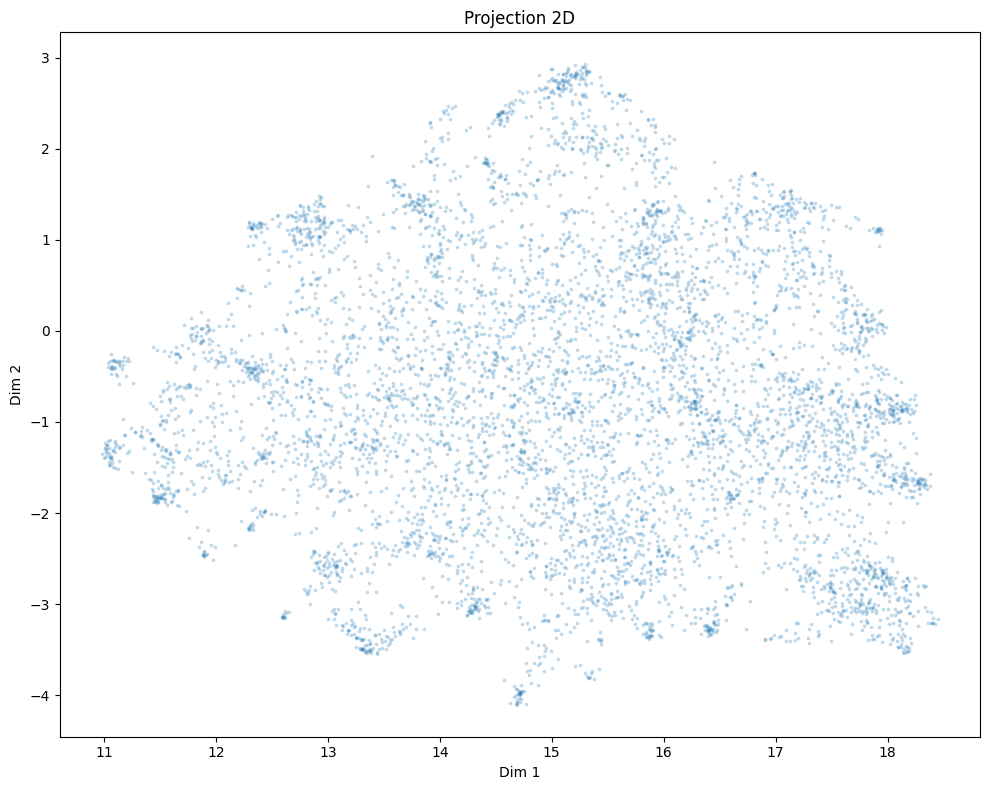

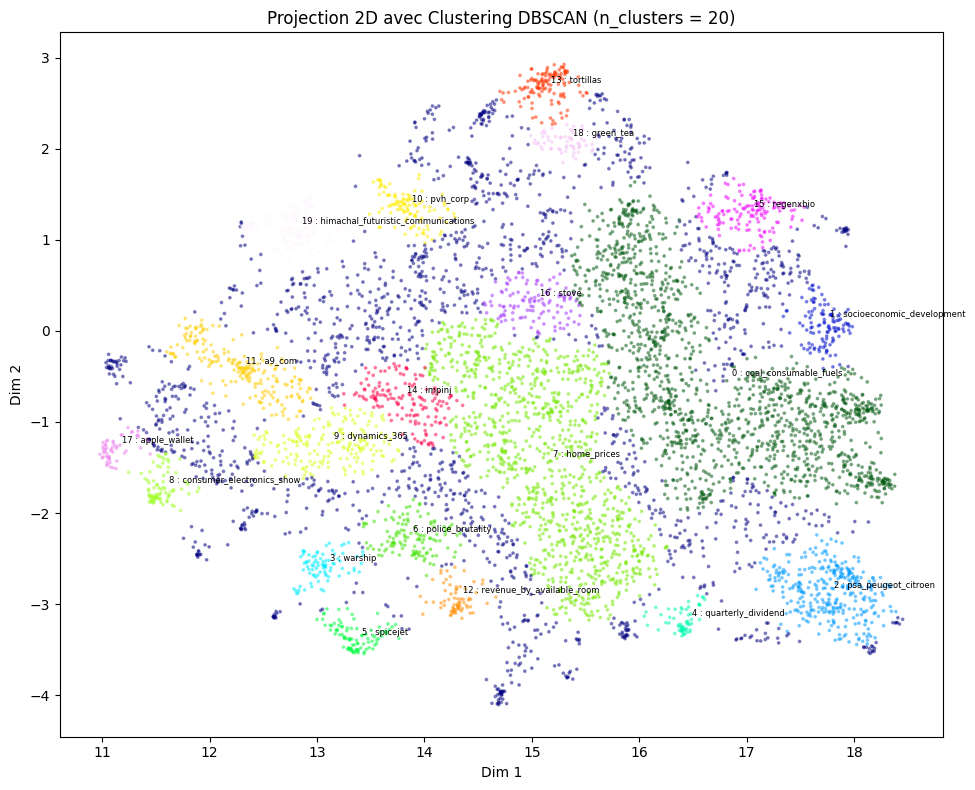

In [11]:
X_latent, labels =compute_latent_and_cluster(lift_matrix, selected_markers,markers_journals, out_prefix="SHOW", 
                                             eps_dbscan=0.25, min_samples_dbscan=50)

## Exemple 1 : Tech

In [24]:
sub_selected_markers_tech = markers_from_cluster(labels, 8, selected_markers)
len(sub_selected_markers_tech), sub_selected_markers_tech

(81,
 array(['camera', 'nvidia', 'personal_computer', 'smartphone',
        'graphics_card', 'gaming_console', 'laptop', 'intel', 'rtx', 'cpu',
        'consumer_electronics_show', 'amd', 'oneplus', 'qualcomm',
        'writing_instrument', 'oled_panel', 'asustek_computer',
        'technology_hardware_storage_peripherals', 'dell_technologies',
        'tent', 'tablet', 'memory_chips', 'battery_life',
        'computer_keyboard', 'hp_inc', 'fp_corp', 'geforce', 'lenovo',
        'solid_state_drive', 'windows', 'chipset', 'snapdragon',
        'amd_ryzen', 'feature_price_point', 'stereo', 'corning',
        'motherboard', 'refrigeration_system', 'mediatek',
        'nvidia_blackwell', 'computer_peripheral', 'firmware', 'razer',
        'realme', 'ddr5_sdram', 'black_friday', 'back_to_school',
        'corsair_gaming', '2_in_1_pc', 'chromebook', 'mobile_video_game',
        'windows_10', 'amd_radeon_rx', 'latch', 'logitech_international',
        'overnight_interest_swap', 'gorilla_glass

In [25]:
sub_lift_matrix_tech, sub_conv_tech = compute_sub_lift_matrix(sub_selected_markers_tech, filtered_marker_df)

INFO: Total unique articles: 1185862
computing cocitation counts: 100%|██████████| 81117/81117 [00:00<00:00, 205215.08it/s]


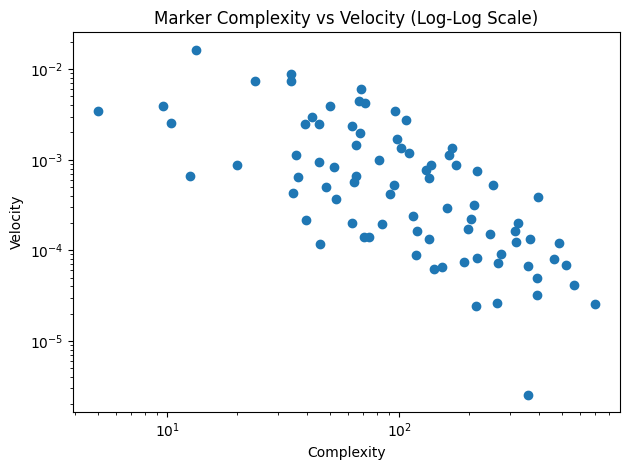

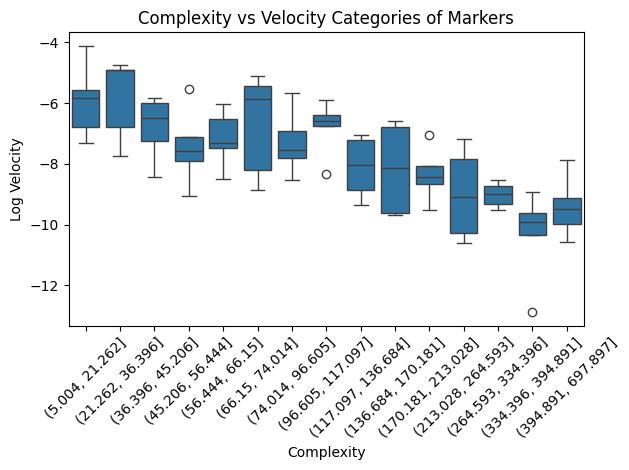

In [26]:
complexities_tech = plot_complexity_vs_velocity(sub_lift_matrix_tech, sub_conv_tech, sub_selected_markers_tech, out_prefix="SHOW")

In [27]:
complexity_df_tech = compute_complexity_df(complexities_tech)
complexity_df_tech

,complexity
marker,
tent,5.005282
writing_instrument,9.567881
feature_price_point,10.383945
latch,12.572628
camera,13.305667
...,...
mini_pc,464.246618
amd_ryzen_7,486.409098
business_laptop,522.117235


In [28]:
top_lifters("core_i7", sub_lift_matrix_tech, sub_conv_tech, complexities_tech, top_n=15)

[('lenovo_thinkpad_x1_carbon', 3231.9090146750523),
 ('elitegroup_computer_systems', 2486.083857442348),
 ('omen', 2130.9290206648693),
 ('amd_ryzen_7', 1916.3563067784764),
 ('amd_radeon_rx', 1771.3347484276728),
 ('business_laptop', 1546.2228869458506),
 ('microsoft_surface_pro', 1028.7243548037302),
 ('windows_10', 975.3098209966136),
 ('gtx', 932.2814465408806),
 ('amd_ryzen', 930.2414433755832),
 ('mini_pc', 854.591325995807),
 ('gaming_computer', 807.3365104065358),
 ('geforce', 756.4629170030599),
 ('chromebook', 687.8969896806497),
 ('solid_state_drive', 594.0833786018662)]

In [29]:
top_lifters("geforce", sub_lift_matrix_tech, sub_conv_tech, complexities_tech , top_n=15)

[('omen', 1150.6148323037614),
 ('nvidia_geforce_now', 1131.8737573836622),
 ('lenovo_thinkpad_x1_carbon', 1002.3133650290544),
 ('amd_radeon_rx', 916.1770602218699),
 ('amd_ryzen_7', 874.4140033456594),
 ('rtx', 842.752268802456),
 ('core_i7', 756.4629170030599),
 ('gaming_computer', 687.7987975231591),
 ('amd_ryzen', 666.1984346336438),
 ('razer', 654.134067646724),
 ('ddr5_sdram', 602.656770112406),
 ('nvidia_blackwell', 597.1011390448033),
 ('business_laptop', 572.9687681187429),
 ('elitebook', 544.0187672032697),
 ('gtx', 542.1166036815799)]

## Exemple 2 Voitures

In [30]:
sub_selected_markers_cars = markers_from_cluster(labels, 2, selected_markers)
len(sub_selected_markers_cars), sub_selected_markers_cars

(330,
 array(['passenger_car', 'motor', 'feature_power_type', 'city_bus',
        'automobile_manufacturers', 'bicycle', 'sport_utility_vehicle',
        'honda_motor_company', 'toyota', 'deliveries', 'ford',
        'volkswagen_corp', 'bmw_group', 'street_motorcycle',
        'mercedes_benz', 'operational_issues', 'hyundai_motor_company',
        'chassis_trailer', 'car_crash', 'general_motors', 'stellantis',
        'recreational_vehicle', 'kia_brand', 'tata_motors', 'tractor',
        'world_war_2', 'product_recall', 'diesel_fuel', 'nissan_brand',
        'incentive_spending', 'hyundai_brand', 'chevrolet_brand',
        'scooter', 'ford_brand', 'audi_brand', 'renault_brand',
        'operating_margin', 'porsche', 'rivian', 'fuel_efficiency',
        'electric_bicycle', 'ferrari', 'original_equipment_manufacturer',
        'car_sharing_industry', 'deere', 'braking_system', 'locomotive',
        'car_registrations', 'volvo_brand', 'byd', 'wait_time',
        'product_discontinued', 'b

In [31]:
sub_lift_matrix_cars, sub_conv_cars = compute_sub_lift_matrix(sub_selected_markers_cars, filtered_marker_df)

INFO: Total unique articles: 1185862
computing cocitation counts: 100%|██████████| 214058/214058 [00:00<00:00, 250027.59it/s]


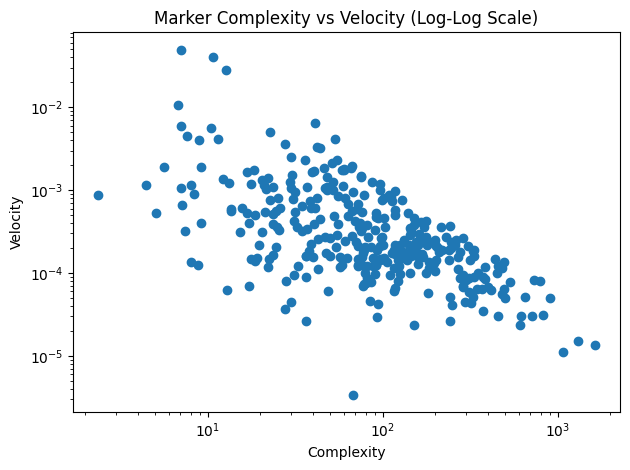

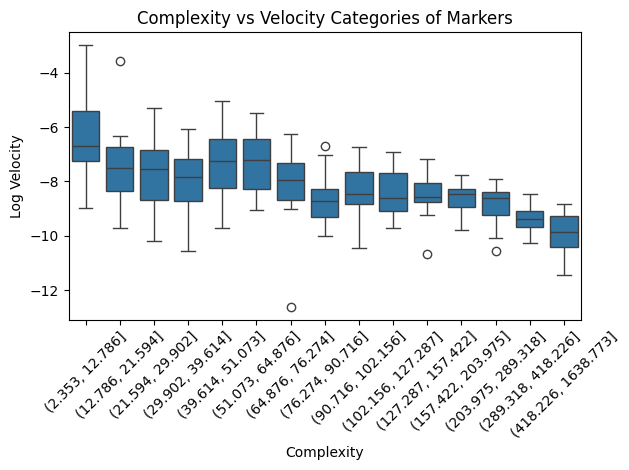

In [32]:
complexities_cars = plot_complexity_vs_velocity(sub_lift_matrix_cars, sub_conv_cars, sub_selected_markers_cars, out_prefix="SHOW")

In [21]:
complexity_df_cars = compute_complexity_df(complexities_cars)
complexity_df_cars

,complexity
marker,
shares_short,0.968213
cynata_therapeutics,1.127887
higher_education,1.507723
for_a_fee_or_free,1.864366
feature_education_level,2.078644
...,...
sinopharm_group,1758.315101
sinovac_biotech,1865.946613
mabpharm,1883.134792


In [22]:
top_lifters("daihatsu_brand", sub_lift_matrix_cars, sub_conv_cars, complexities_cars , top_n=15)

[]

In [23]:
top_lifters("automotive_chip", sub_lift_matrix_cars, sub_conv_cars, complexities_cars , top_n=15)

[]